In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Wavelength

In [3]:
wavelength = 525*1e-6

In [4]:
# Determining the wavelength
def disp_to_wavelength(N, delx):
    """Returns wavelength from displacement and fringe count"""
    return 2*delx/N

# (N fringes, del x in mm)
N_delx = [(20,(10.5+2.5)*0.0005),(30,15*0.0005), (50,22*0.0005), (20,12*0.0005), (40,20*0.0005), (50, 19*0.0005), (30,14*0.0005), (39,21*0.0005), (36,20.5*0.0005), (20,9.5*0.0005)]
delx = np.array([i[1] for i in N_delx])
N = np.array([i[0] for i in N_delx])
comp_wavelength = disp_to_wavelength(N, delx)
np.mean(comp_wavelength)*1e6,np.std(comp_wavelength)*1e6

(511.95726495726495, 75.5699477726131)

In [5]:
len(N_delx)

10

## Temp coeff

In [6]:
# Determining thermal expansion coefficient


def fringe_to_dist(wavelength, N):
    """Returns distance based on wavlength and number of fringes"""
    return N*wavelength/2

# Temperatures when new fringe appears
tmps_ascending = [29.0,29.1,29.3,29.4,29.5,29.6,29.6,29.8,30.0,30.2,30.3,30.4,30.6,30.8,30.8,30.9,31.0,31.2,31.4,31.5,31.8,32,32.1,32.2,32.3,32.5,32.7,32.8,32.9,33.1,33.2,33.3,33.3,33.4,33.5,33.6,33.9,34,34.1,34.3,34.5,34.6,34.7,34.8,34.9,35.1,35.3,35.4,35.6,35.8,35.9,36.0,36.1,36.3,36.5,36.6,36.7,36.8,36.9,37.0,37.2,37.2,37.3,37.4,37.6]
temps_descending = [37.7,37.6,37.4,37.3,37.2,37.1,37,36.8,36.6,36.4,36.2,36.2,36,35.9,35.9,35.8,35.6,35.4,35.3,35.2,35.0,34.8,34.7,34.6,34.6,34.5,34.2,34.1,34.0,33.9,33.8,33.5,33.4,33.3,33.3,33.1,32.9,32.8,32.7,32.6,32.4,32.2,32.1,32.0,32.0,31.9,31.5]

# List of (start_T, stop_T, nr of fringes)
fringe_counted_for_tmp_diff = [(31, 33.1,20),(33.4,39.4,50), (40.5,47.2,50),(48,49.3,10),(46.2,42.9,25), (42.5,39.9,20), (38.3,37.1,10)]
long_count_tmp_diff = [i[1]-i[0] for i in fringe_counted_for_tmp_diff]
long_count_fringes = [i[2] for i in fringe_counted_for_tmp_diff]

def dist_temp_var_to_heat_coeff(delL,L_0,delT):
    """Returns temp coefficient with parameter"""
    return delL/L_0/delT

def compute_alpha_from_temp_list_using_rolling(temperature_list, L0, rolling):
    """Computes thermal expansion coeff, from list of temperatures"""
    # Temperature when new fringe appeared in ascending order 
    # Rolling difference first item needs to be treated seperately, (last element not computed)
    temp_diff_1 = np.diff(temperature_list,rolling)
    fringe_count = np.linspace(1,len(temp_diff_1),len(temp_diff_1))
    temp_diff_1_dist = fringe_to_dist(525*1e-6, fringe_count)
    return dist_temp_var_to_heat_coeff(temp_diff_1_dist,1,temp_diff_1)

# TODO Fix L0 and wavelength (idk)
L0 = 8.9*10 # m
heat_coeff_rolling_params_ascending_sample = [compute_alpha_from_temp_list_using_rolling(temperature_list=tmps_ascending, L0=L0, rolling=i) for i in range(1,10)]
heat_coeff_rolling_params_descending_sample = [np.abs(compute_alpha_from_temp_list_using_rolling(temperature_list=temps_descending, L0=L0, rolling=i)) for i in range(1,10)]
heat_coeff_long_count = [np.abs(dist_temp_var_to_heat_coeff(delL=fringe_to_dist(525*1e-6, long_count_fringes[i]),L_0=L0,delT=long_count_tmp_diff[i])) for i in range(len(long_count_fringes))]

/tmp/ipykernel_986692/3039545108.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return delL/L_0/delT


In [7]:
len(tmps_ascending)+ len(temps_descending)

112

In [8]:
from IPython.display import display, Math, Latex
np.mean(heat_coeff_long_count), np.std(heat_coeff_long_count)
display(Latex('The coefficient is determined to be ${:.4}\pm{:.4}$'.format(np.mean(heat_coeff_long_count), np.std(heat_coeff_long_count))))
print('FIX units')

<IPython.core.display.Latex object>

FIX units


## Index of Refraction

In [9]:
# Index of refraction
t = 0.83*10 # mm 

# Angle per fringe of a deg --- alll in deg
offset = 15/25
theta = [31, 41, 48, 52, 57, 61, 65, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]
theta = [(i/25-offset)*np.pi/180 for i in theta]

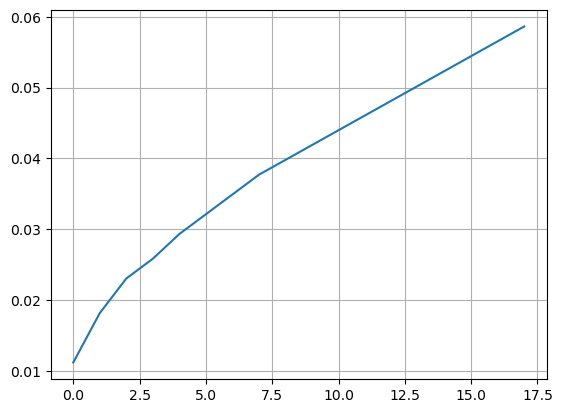

In [10]:
plt.plot(theta)
plt.grid()

In [11]:
def get_index(N, wavlength, angle, thickness):
    common = (N*wavelength/2*thickness+np.cos(angle)-1)**2
    num = common+np.sin(angle)**2
    den = 2*common
    return num/den

In [12]:
fringes = np.linspace(1,len(theta),len(theta))
index = get_index(fringes, wavelength,theta,t)

Mode of dataset 1.9764043770795918
Last datapoint 1.7214561180647285
Average 4.021647166342475
Std 3.2822087373791025


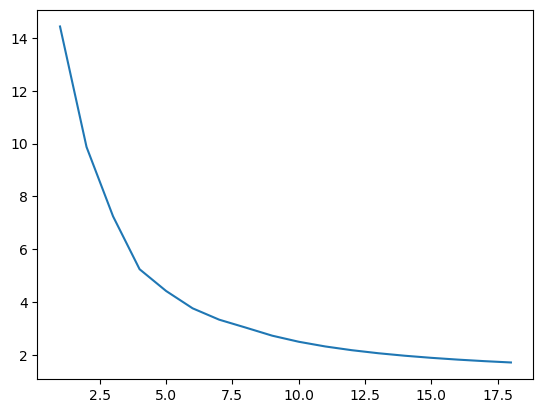

In [13]:
plt.plot(fringes, index)
print("Mode of dataset {}".format(max(set(index), key=list(index).count)))
print("Last datapoint {}".format(index[-1]))
print("Average {}".format(np.mean(index)))
print("Std {}".format(np.std(index)))

In [14]:
def minimize_std_for_index(x0, theta, fringes, wavelength, t):
    """Change angle scaling and offset to achieve linear results
    To do so the standard deviation is minimized as all data points should represent the same index
    x0 = [normal error, scaling coeff]
    """
    theta = [x0[0]+i*x0[1]+i*x0[2]**2 for i in theta]
    return np.sqrt(np.mean(get_index(fringes, wavelength,theta,t)**2))
# x0 represents [normal error, scaling coeff, second order]
res = scipy.optimize.minimize(minimize_std_for_index, x0=[0,1, 0],args=(theta, fringes, wavelength, t),bounds=((0,1000),(1,1000),(0,100000)))

[0. 1. 0.]


1.7214561180647285

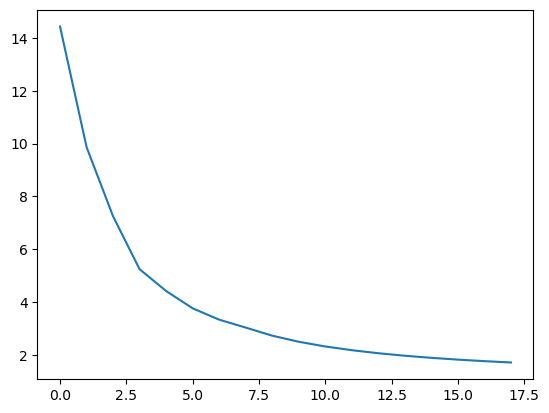

In [15]:
x0 = res.x
print(x0)
theta_mod = [x0[0]+i*x0[1] for i in theta]
index_mod = get_index(fringes, wavelength,theta_mod,t)
plt.plot(index_mod)
np.min(index_mod)


## Piezzo

In [47]:
# Data
# Voltage when fringe disappeared, starting point 0.02V
det_piezzo_up = [0.9,2.22,3.52,4.95,5.95,7.05,8.15,9.36, 10.57,11.78, 12.79,13.8,14.6,15.9,16.82,17.93,18.74,19.74,20.65, 21.56,22.36,23.27,24.18,24.69,25.69,26.50,27.10,28.01,28.7,29.5,30.33, 31.13, 31.84,32.52,33.34,34.25,34.86,35.67,36.37,37.18,37.88,38.59,39.29,40.20,40.89, 41.51,42.31,43.12,43.83,44.73,45.33,46.15,46.75,47.55,48.36,48.96,49.85,50.48, 51.18,51.98,52.89,53.59,54.3,55.00,55.8,56.7,57.4,58.21,59.02,59.73,60.44,61.34,62.15,62.86,63.57,64.26,65.27, 66.09, 66.87,67.59,68.48,69.32,69.99,70.79,71.59,72.4,73.2,73.91,74.81]
# Voltage when fringe appears, starting point 74.9V
det_piezzo_down = [74.4,72.72,71.19,69.78,68.17,66.98,65.65,64.26,62.86,61.63,60.42,59.21,58.11,56.69,55.78,54.60,53.48,52.48,51.37,50.26,49.14,48.15,47.14,45.92,44.91,44.11,43.01,42.01,41.20,40.18,39.08,38.18,37.37,36.47,35.56,34.55,33.74,32.84,32.04,31.13,30.01,29.41,28.4,27.59,26.60,26.09,24.99,24.08,23.28,22.47,21.66,20.74,20.05,19.05,18.34,17.53,16.72,16.02,15.32,14.31,13.71,12.80,12.09,11.29,10.48,9.78,8.27,7.64,6.73,5.95,5.25,4.34,3.84,3.03,2.23,1.49,0.72,0.01]
# Double fringe for voltage measuremnt start at 0.49V
det_piezzo_up_double = [3.31,5.73,8.04,10.26,12.58,14.90,16.81,18.93,20.95,22.76,24.67,26.59,28.4,30.32,32.03,33.84,35.76,37.27,38.78,40.69,42.5,44.11,45.82,47.34,49.15,50.75,52.47,54.08,55.78,57.50,59.01,60.81,62.53,64.22,65.95,67.68,69.27,70.99,72.79,74.5]
# And back down start74.56V
det_piezzo_down_double = [72.37,70.64,67.73,65.12,62.51,59.8,57.48,55.15,52.84,50.83, 48.61,46.51,44.48,42.47,40.66,38.45,36.74,34.11,32.1,30.38,28.57,27.27,25.35,23.73,21.74,19.91,18.10,16.59,14.98,13.66,12.77,11.36,9.54,8.03,6.61,4.89,3.41,2.17,0.66]


In [48]:
# Seci.bd run
det_piezzo_up_2 = [1.61,2.62,3.83,5.04,6.05,7.16,8.16,9.17,10.18,10.99,11.59,12.70,13.41,14.41,15.23,16.13,16.73,17.64,18.65,19.66,20.46,21.27,22.18,22.88,23.38,24.39,25.30,26,26.70,27.60,28.30,29.30,30.14,30.84,31.74,32.45,33.15,33.76,34.77,35.47,36.18,37.10,37.89,38.60,39.50,40.21,40.81,41.61,42.52,43.33,44.4,44.74,45.74,46.25,47.06,47.77,48.57,49.17,49.98,50.69,51.39,52.50,53.20,54.11,54.70,55.42,56.23,57.13,57.84,58.55,59.34,60.05,60.75,61.66,62.47,63.27,63.97,64.89,65.68,66.48,67.40,68.10,68.9,69.60,70.3,71.3,72.2,73.01,73.82,74.73,]
det_piezzo_down_2 = [75, 73.81,72.28,70.68,69.16,67.67,66.27,65.13,63.94,62.4,61.12,60.9,58.8,57.47,56.24,55.37,54.16,53.06,52.06,50.84,49.74,48.74,47.71,46.61,45.61,44.70,43.80,42.58,41.78,40.77,39.67,38.86,37.84,36.93,36.03,35.14,34.32,33.32,32.52,31.41,30.70,29.99,28.98,28.08,27.07,26.26,25.56,24.76,23.64,22.84,22.14,21.12,20.23,19.51,18.70,17.80,17.10,16.30,15.19,14.18,13.06,12.36,11.66,10.97,10.06,9.33,8.44,7.72,7.03,6.22,5.52,4.82,4.01,3.31,2.68,1.80,1.09,0.19]

In [18]:
print('0.5 fringes = {} mm'.format(fringe_to_dist(wavelength, 0.5)))

0.5 fringes = 0.00013125 mm


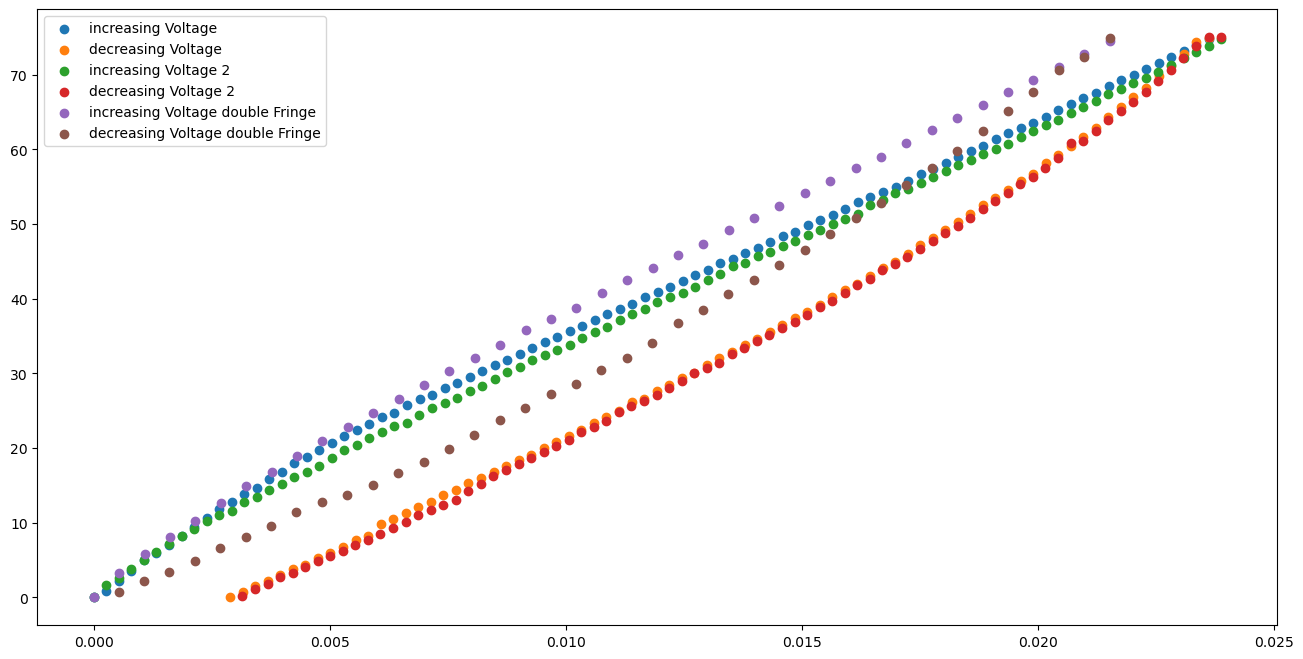

In [52]:
# Plot TODO: Redo
fig = plt.figure(figsize=(16,8))
det_piezzo_up_ws = [0.02]+det_piezzo_up
piezzo_up_dist = np.linspace(0,len(det_piezzo_up)+1,len(det_piezzo_up)+1)
piezzo_up_dist = fringe_to_dist(wavelength, piezzo_up_dist)
piezzo_up_dist = [i for i in piezzo_up_dist]

plt.scatter(piezzo_up_dist, det_piezzo_up_ws,label='increasing Voltage')

det_piezzo_down_ws = [74.9]+det_piezzo_down
piezzo_down_dist = np.linspace(0,len(det_piezzo_down)+1,len(det_piezzo_down)+1)
piezzo_down_dist = fringe_to_dist(wavelength, piezzo_down_dist)
piezzo_down_dist = [(max(piezzo_up_dist)-i) for i in piezzo_down_dist]

plt.scatter(piezzo_down_dist, det_piezzo_down_ws,label='decreasing Voltage')

det_piezzo_up_ws = [0]+det_piezzo_up_2
piezzo_up_dist = np.linspace(0,len(det_piezzo_up_2)+1,len(det_piezzo_up_2)+1)
piezzo_up_dist = fringe_to_dist(wavelength, piezzo_up_dist)
piezzo_up_dist = [i for i in piezzo_up_dist]

plt.scatter(piezzo_up_dist, det_piezzo_up_ws,label='increasing Voltage 2')

det_piezzo_down_ws = [75]+det_piezzo_down_2
piezzo_down_dist = np.linspace(0,len(det_piezzo_down_2)+1,len(det_piezzo_down_2)+1)
piezzo_down_dist = fringe_to_dist(wavelength, piezzo_down_dist)
piezzo_down_dist = [(max(piezzo_up_dist)-i) for i in piezzo_down_dist]

plt.scatter(piezzo_down_dist, det_piezzo_down_ws,label='decreasing Voltage 2')


det_piezzo_up_d_ws = [0.02]+det_piezzo_up_double
det_piezzo_up_double_dist = np.linspace(0,len(det_piezzo_up_double)+1,len(det_piezzo_up_double)+1)
det_piezzo_up_double_dist = fringe_to_dist(wavelength, det_piezzo_up_double_dist)
det_piezzo_up_double_dist = [i*2 for i in det_piezzo_up_double_dist]

plt.scatter(det_piezzo_up_double_dist, det_piezzo_up_d_ws,label='increasing Voltage double Fringe')

det_piezzo_down_double_ws = [74.9]+det_piezzo_down_double
det_piezzo_down_double_dist = np.linspace(0,len(det_piezzo_down_double)+1,len(det_piezzo_down_double)+1)
det_piezzo_down_double_dist = fringe_to_dist(wavelength, det_piezzo_down_double_dist)
det_piezzo_down_double_dist = [(max(det_piezzo_up_double_dist)-i*2) for i in det_piezzo_down_double_dist]

plt.scatter(det_piezzo_down_double_dist, det_piezzo_down_double_ws,label='decreasing Voltage double Fringe')


plt.legend()

In [56]:
piezzo_up_dist_tot = []
piezzo_up_Volt_tot = []
piezzo_down_dist_tot = []
piezzo_down_Volt_tot = []

piezzo_up_Volt_tot += [0.02]+det_piezzo_up
piezzo_up_dist = np.linspace(0,len(det_piezzo_up)+1,len(det_piezzo_up)+1)
piezzo_up_dist = fringe_to_dist(wavelength, piezzo_up_dist)
piezzo_up_dist_tot += [i for i in piezzo_up_dist]

piezzo_down_Volt_tot += [74.9]+det_piezzo_down
piezzo_down_dist = np.linspace(0,len(det_piezzo_down)+1,len(det_piezzo_down)+1)
piezzo_down_dist = fringe_to_dist(wavelength, piezzo_down_dist)
piezzo_down_dist_tot += [(max(piezzo_up_dist)-i) for i in piezzo_down_dist]

piezzo_up_Volt_tot += [0]+det_piezzo_up_2
piezzo_up_dist = np.linspace(0,len(det_piezzo_up_2)+1,len(det_piezzo_up_2)+1)
piezzo_up_dist = fringe_to_dist(wavelength, piezzo_up_dist)
piezzo_up_dist_tot += [i for i in piezzo_up_dist]

piezzo_down_Volt_tot += [75]+det_piezzo_down_2
piezzo_down_dist = np.linspace(0,len(det_piezzo_down_2)+1,len(det_piezzo_down_2)+1)
piezzo_down_dist = fringe_to_dist(wavelength, piezzo_down_dist)
piezzo_down_dist_tot += [(max(piezzo_up_dist)-i) for i in piezzo_down_dist]

indx = np.argsort(piezzo_up_dist_tot)
piezzo_up_Volt_tot = np.array(piezzo_up_Volt_tot)[indx]
piezzo_up_dist_tot = np.array(piezzo_up_dist_tot)[indx]

indx = np.argsort(piezzo_down_dist_tot)
piezzo_down_Volt_tot = np.array(piezzo_down_Volt_tot)[indx]
piezzo_down_dist_tot = np.array(piezzo_down_dist_tot)[indx]

# Remove duplicates in x for cubicspline
m = np.zeros_like(piezzo_up_dist_tot, dtype=bool)
m[np.unique(piezzo_up_dist_tot, return_index=True)[1]] = True
piezzo_up_dist_tot = piezzo_up_dist_tot[m]
piezzo_up_Volt_tot = piezzo_up_Volt_tot[m]

m = np.zeros_like(piezzo_down_dist_tot, dtype=bool)
m[np.unique(piezzo_down_dist_tot, return_index=True)[1]] = True
piezzo_down_dist_tot = piezzo_down_dist_tot[m]
piezzo_down_Volt_tot = piezzo_down_Volt_tot[m]

# Double dist down has one double
indx = np.argsort(det_piezzo_down_double_dist)
det_piezzo_down_double_ws = np.array(det_piezzo_down_double_ws)[indx]
det_piezzo_down_double_dist = np.array(det_piezzo_down_double_dist)[indx]
m = np.zeros_like(det_piezzo_down_double_dist, dtype=bool)
m[np.unique(det_piezzo_down_double_dist, return_index=True)[1]] = True
det_piezzo_down_double_dist = np.array(det_piezzo_down_double_dist)[m]
det_piezzo_down_double_ws = np.array(det_piezzo_down_double_ws)[m]

ValueError: A value in x_new is below the interpolation range.

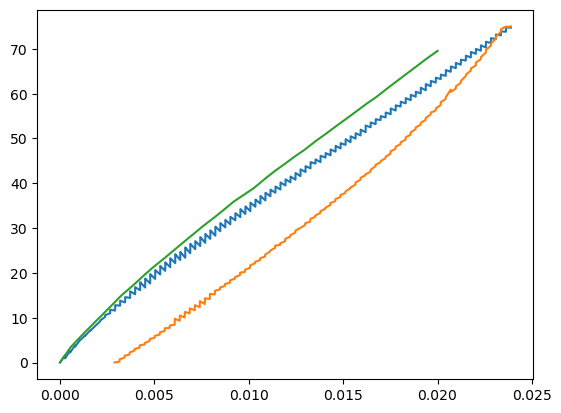

In [71]:
plt.plot(np.linspace(min(piezzo_up_dist_tot),max(piezzo_up_dist_tot),10000),scipy.interpolate.interp1d(x=piezzo_up_dist_tot,y=piezzo_up_Volt_tot)(np.linspace(min(piezzo_up_dist_tot),max(piezzo_up_dist_tot),10000)),label='Increasing Voltage')
plt.plot(np.linspace(min(piezzo_down_dist_tot),max(piezzo_down_dist_tot),10000),scipy.interpolate.interp1d(x=piezzo_down_dist_tot,y=piezzo_down_Volt_tot)(np.linspace(min(piezzo_down_dist_tot),max(piezzo_down_dist_tot),10000)),label='Decreasing Voltage')

plt.plot(np.linspace(min(det_piezzo_up_double_dist),max(det_piezzo_up_double_dist),10000),scipy.interpolate.interp1d(x=det_piezzo_up_double_dist,y=det_piezzo_up_d_ws)(np.linspace(min(det_piezzo_up_double_dist),max(det_piezzo_up_double_dist),10000)),label='Increasing Voltage, fast')
plt.plot(np.linspace(min(det_piezzo_down_double_dist),max(det_piezzo_down_double_dist),10000),scipy.interpolate.interp1d(x=det_piezzo_down_double_dist,y=det_piezzo_down_double_ws)(np.linspace(min(det_piezzo_down_double_dist),max(det_piezzo_down_double_dist),10000)),label='Decreasing Voltage, fast')

plt.legend()
plt.ylabel('Voltage [V]')
plt.xlabel('Distance [mm]')
plt.title('Pieze Hysterisis Curve')